# House sales

A real estate company focuses on selling houses, with a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, the company would like to optimize the listing prices of the houses it is trying to sell.

The agents of the company want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Number of missings values for the field "city"

In [1]:
import pandas as pd
house_df = pd.read_csv('house_sales.csv')
print(house_df.head())
missing_city = house_df['city'].isnull().sum()

   house_id        city  sale_price   sale_date  months_listed  bedrooms  \
0   1217792  Silvertown       55943  2021-09-12            5.4         2   
1   1900913  Silvertown      384677  2021-01-17            6.3         5   
2   1174927   Riverford      281707  2021-11-10            6.9         6   
3   1773666  Silvertown      373251  2020-04-13            6.1         6   
4   1258487  Silvertown      328885  2020-09-24            8.7         5   

      house_type         area  
0  Semi-detached  107.8 sq.m.  
1       Detached  498.8 sq.m.  
2       Detached  542.5 sq.m.  
3           Det.  528.4 sq.m.  
4       Detached  477.1 sq.m.  


# Cleaning the data set 


 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


- The cleaning is done in two steps: impute the NaN values recognized as such. Search and replace values that are not NaN but do not comply with the expected values due to mispelling or insertion of extra text (for numeric)

In [2]:
print(house_df.isnull().sum())
#only missing values are in months_listed column, now check the unique values
print(house_df['city'].unique())
print(house_df['bedrooms'].unique())
print(house_df['house_type'].unique())
print(house_df['months_listed'].unique())
print(house_df['area'].unique())
print(house_df['sale_price'].unique())
fill_values = {'months_listed': round(house_df['months_listed'].mean(),2)}
house_df = house_df.fillna(value=fill_values)
#some values are not recognized as NaN but nevertheless need a fix
replace_values = {'city': {'--': 'Unknown'}, 'house_type' : {'Det.':'Detached', 'Semi':'Semi-detached', 'Terr.':'Terraced'}}
house_df.replace(replace_values,inplace = True)
house_df['area'] = house_df['area'].str.strip(' sq.m.')
print('after cleaning:')
print(house_df.isnull().sum())
print(house_df['city'].unique())
print(house_df['bedrooms'].unique())
print(house_df['house_type'].unique())
print(house_df['months_listed'].unique())
print(house_df['area'].unique())
print(house_df['sale_price'].unique())
house_df["area"] = house_df["area"].astype(float)
house_df["house_type"] = house_df["house_type"].astype('category')
print(house_df.dtypes)
clean_data = house_df

house_id          0
city              0
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64
['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' '--']
[2 5 6 4 3]
['Semi-detached' 'Detached' 'Det.' 'Terraced' 'Semi' 'Terr.']
[ 5.4  6.3  6.9  6.1  8.7  5.1  nan  5.8  4.4  3.   4.6  3.7  6.2  5.3
  3.5  5.   5.5  7.8  4.9  4.7  8.9  5.9  3.8  4.8  7.6  6.4  7.9  6.6
  4.1  7.4  7.1  6.7  3.9  4.3  8.1  6.5  7.7  5.2  2.6  4.2  1.2  8.
  5.6  3.3  7.3  9.4  8.8  6.   3.6  3.2  8.5  4.5 10.4  9.2  1.7 10.2
  0.8  5.7  2.   2.3  8.6  7.5  9.6  9.7  6.8  2.2  2.5  4.   8.3 10.7
  2.7  3.4  7.   9.1  2.8  8.2 11.4 10.   2.9 10.1  7.2 10.5  9.9  3.1
  9.3  9.   1.3  8.4 11.   1.9 12.3  9.5  2.1  9.8  2.4  0.5 11.5  1.8
  1.6  1.5 10.8  1.4 11.6 10.3 10.6  0.6 11.3 11.7 11.8  1.1  1.  10.9]
['107.8 sq.m.' '498.8 sq.m.' '542.5 sq.m.' ... '432.2 sq.m.' '253.7 sq.m.'
 '268.7 sq.m.']
[ 55943 384677 281707 ... 176612 197827

# Investigate the average price per number of bedrooms

The company suspects that the number of bedrooms is an important feature to drive the house price. 

Let us examine the mean and variance of the house price as a function of bedrooms: 

In [3]:
# Use this cell to write your code for Task 3
import numpy as np
price_by_rooms = clean_data.groupby('bedrooms').agg(avg_price=('sale_price', 'mean'),var_price=('sale_price', 'var')).round(1).reset_index()
print(price_by_rooms)

   bedrooms  avg_price     var_price
0         2    67076.4  5.652896e+08
1         3   154665.1  2.378289e+09
2         4   234704.6  1.725211e+09
3         5   301515.9  2.484328e+09
4         6   375741.3  3.924432e+09


We clearly observe the increase of the price with the number of bedrooms but the variances are quiet big. Other features may help to improve the accuracy

# Fit a simple baseline model to the sale price


 The train dataset “train.csv” is used for the model training while the validation file “validation.csv” is used for predicting new values based on the model. We have seen that the number of bedrooms is a relevant feature but probably is not enough due to the observed spread of prices about the mean for a given number of bedrooms. We thus explore more features and add them to our model. We need to convert the categorical variables to numeric by encoding them.

In [4]:
# Use this cell to write your code for Task 4
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')
print(train_df.dtypes)
# first some checks:
#print(train_df.isna().sum())
#print(train_df['city'].unique())
#print(train_df['bedrooms'].unique())
#print(train_df['house_type'].unique())
#print(train_df['months_listed'].unique())
#print(train_df['area'].unique())
#print(train_df['sale_price'].unique())
##Everything being cleared, we proceed to the encoding:
train_df["house_type"] = train_df["house_type"].astype('category')
train_df["house_type"]= train_df["house_type"].astype('category').cat.codes
encode_cat = {"city":     {'Teasdale':1, 'Silvertown':2, 'Poppleton':3, 'Riverford':4}}
train_df = train_df.replace(encode_cat)
print(train_df.head())
#We do the same for the validation part:
validation_df = pd.read_csv('validation.csv')
#checks:
#print(validation_df.isna().sum())
#print(validation_df['city'].unique())
#print(validation_df['bedrooms'].unique())
#print(validation_df['house_type'].unique())
#print(validation_df['months_listed'].unique())
#print(validation_df['area'].unique())
validation_df["house_type"] = validation_df["house_type"].astype('category')
validation_df["house_type"]= validation_df["house_type"].astype('category').cat.codes
validation_df = validation_df.replace(encode_cat)
#validation_df = pd.get_dummies(validation_df, columns=['city'])


house_id           int64
city              object
sale_price         int64
sale_date         object
months_listed    float64
bedrooms           int64
house_type        object
area             float64
dtype: object
   house_id  city  sale_price   sale_date  months_listed  bedrooms  \
0   1634561     1      401869  2021-12-14            7.0         6   
1   1009770     2      372387  2022-09-11            8.1         6   
2   1946667     2      325473  2020-08-19            5.4         5   
3   1798290     2      349469  2022-12-10            6.4         5   
4   1533461     3      199995  2020-04-07            4.3         4   

   house_type   area  
0           0  519.7  
1           0  507.8  
2           0  466.8  
3           0  499.4  
4           0  335.0  


### Let us now do some plots to verify the influence of features beyond the number of bedrooms

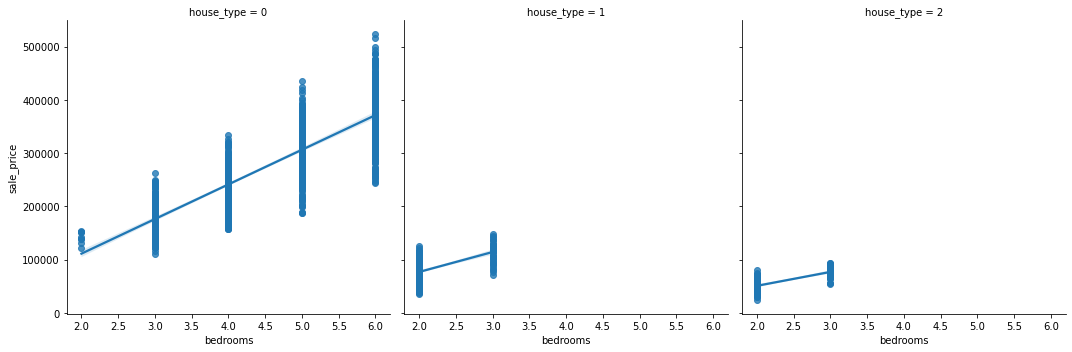

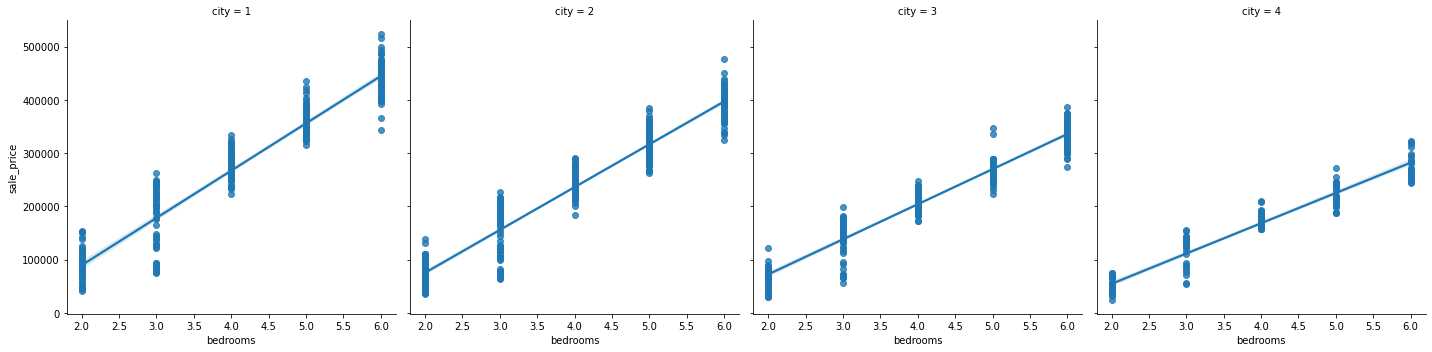

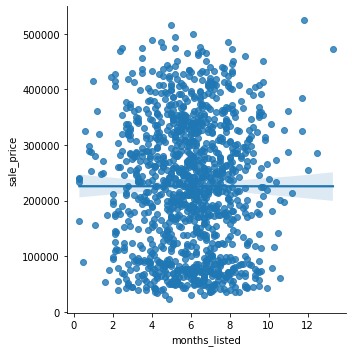

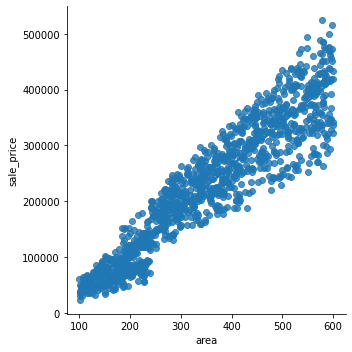

In [5]:
sns.lmplot(data=train_df, x='bedrooms', y='sale_price', col = 'house_type')
sns.lmplot(data=train_df, x='bedrooms', y='sale_price', col = 'city')
sns.lmplot(data=train_df, x='months_listed', y='sale_price')
sns.lmplot(data=train_df, x='area', y='sale_price')
plt.show()

We observe the correlation with all the features except the number of months listed which has little impact over the price.

We next prepare the data for the fit and set up the model. We start with a simple linear regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#features = ['bedrooms','months_listed','area','house_type','city']
features = ['bedrooms','area','house_type','city']
X_train = train_df[features]
y_train = train_df[['sale_price']]
X_val = validation_df[features]

linreg_cv = LinearRegression()
cv_score = cross_val_score(linreg_cv, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print('cross valid score: ', np.sqrt(-cv_score))
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_val)
#print(y_pred)
base_result = validation_df[['house_id']].copy()
y_pred = y_pred.reshape(-1)
base_result['price'] = y_pred.tolist()
print(base_result)

cross valid score:  [21182.42338892 22225.33024854 23990.21548046 21439.83820376
 19887.58768825]
     house_id          price
0     1331375  122069.916301
1     1630115  304419.052147
2     1645745  382931.449466
3     1336775  120490.457540
4     1888274  270728.132710
..        ...            ...
295   1986255  352334.371836
296   1896276  367856.480112
297   1758223  256611.318187
298   1752010  172823.177318
299   1651404  390305.049521

[300 rows x 2 columns]


# Improvement: try a more sophisticated model

In order to improve the root mean squared error, we decide to use a RandomForestRegressor. We first proceed to hyperparameters tuning and then use the best parameters and estimator to fit the training data.

In [7]:
# Use this cell to write your code for Task 5
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestRegressor()
params = {'n_estimators': [100, 500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}
#optimize alpha parameter of ridge
#rf_gs= GridSearchCV(rf_clf, params, scoring='neg_mean_squared_error',cv=3)
#rf_gs.fit(X_train,y_train)
#rf_best = rf_gs.best_estimator_
rf_best = RandomForestRegressor(n_estimators=700, max_depth=None, min_samples_split=3)
#print('best params: ',rf_gs.best_params_)
#print('best score: ',np.sqrt(-rf_gs.best_score_))
rf_best.fit(X_train,y_train)
y_pred = rf_best.predict(X_val)
compare_result = base_result[['house_id']].copy()
y_pred = y_pred.reshape(-1)
compare_result['price'] = y_pred.tolist()
print(compare_result)

/home/user1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


     house_id          price
0     1331375   81155.567769
1     1630115  304506.672036
2     1645745  401149.669777
3     1336775  109102.414641
4     1888274  268945.120005
..        ...            ...
295   1986255  360118.131668
296   1896276  370959.768102
297   1758223  268763.348867
298   1752010  176591.447293
299   1651404  433150.830354

[300 rows x 2 columns]


We obtained the optimal results:

best params:  {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 700}

best score:  16172.39874771908

which is a substantial improvement to the score obtained with the LinearRegression model (near 22000 on average).